<a href="https://colab.research.google.com/github/novrian6/multiclass-classification/blob/main/multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorflow.org/datasets/catalog/fashion_mnist


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [ ]:

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [ ]:
print (f"Training sample:{train_data[0]}")

Training sample:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   

In [ ]:
print (f"Training labels:{train_labels[0]}")

Training labels:9


In [ ]:
#check the shape?
train_data[0].shape

(28, 28)

In [ ]:
train_labels[0].shape

()

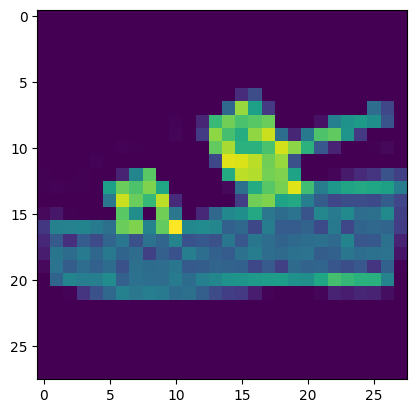

In [ ]:
#plot single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[12])

In [ ]:
#check label

In [ ]:
train_labels[12]

5

In [ ]:
#Create small list so we can index onto our traininng labels so they're human readable
class_names=["tshirt/top","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag","ankle boot"]

In [ ]:
len(class_names)

10

Text(0.5, 1.0, 'sandal')

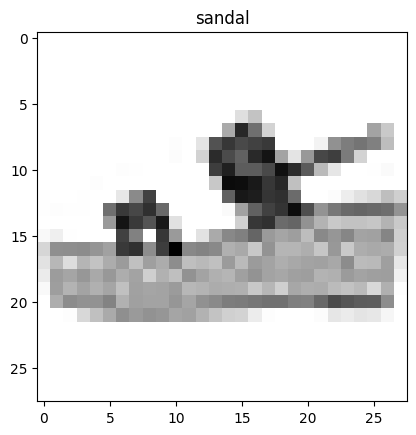

In [ ]:
idx=12
plt.imshow(train_data[idx],cmap=plt.cm.binary)
plt.title(class_names[train_labels[idx]])

In [ ]:
import random
plt.figure (figsize=(7,7))

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

In [ ]:
train_data.shape

(60000, 28, 28)

In [ ]:
import tensorflow as tf


In [ ]:
model_l1= tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(4,activation="relu"),
        tf.keras.layers.Dense(10,activation=tf.keras.activations.softmax)

    ]
)

In [ ]:
model_l1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics =["accuracy"]
                 )

In [ ]:
non_norm_history=model_l1.fit(train_data, tf.one_hot(train_labels, depth =10), epochs=10, validation_data=(test_data,tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.4798 - accuracy: 0.0994 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3029 - accuracy: 0.0987 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy:

In [ ]:
 train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
 tf.one_hot(train_labels, depth =10)

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

<Axes: >

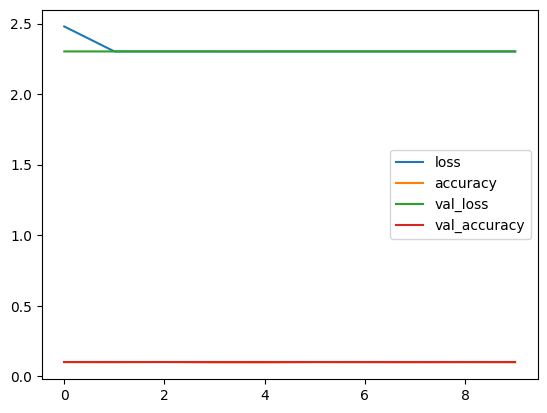

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot()

In [ ]:
model_l1.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_48 (Dense)            (None, 4)                 3140      
                                                                 
 dense_49 (Dense)            (None, 4)                 20        
                                                                 
 dense_50 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_data.min()

0

In [ ]:
train_data.max()

255

In [ ]:
train_data_norm=train_data/255.0

In [ ]:
test_data_norm=test_data/255.0

#Normalized Scenario with label one hot

In [ ]:
tf.random.set_seed(42)

In [ ]:
model_12 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ]
)


In [ ]:
model_12.compile (loss=tf.keras.losses.CategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics= ["accuracy"])

In [ ]:
normal_12=model_12.fit(train_data_norm, tf.one_hot(train_labels, depth =10), epochs=30, validation_data=(test_data_norm,tf.one_hot(test_labels, depth=10)))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5571 - accuracy: 0.8038 - val_loss: 0.6097 - val_accuracy: 0.7931
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5556 - accuracy: 0.8058 - val_loss: 0.6363 - val_accuracy: 0.7828
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5545 - accuracy: 0.8056 - val_loss: 0.6103 - val_accuracy: 0.7919
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5533 - accuracy: 0.8062 - val_loss: 0.6008 - val_accuracy: 0.7989
Epoch 5/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5542 - accuracy: 0.8059 - val_loss: 0.6348 - val_accuracy: 0.7849
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5519 - accuracy: 0.8067 - val_loss: 0.6133 - val_accuracy: 0.7922
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5532 - accuracy: 0.8058 - val_loss: 0.6420 - val_accuracy:

In [ ]:
model_12.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 784)               0         
                                                                 
 dense_54 (Dense)            (None, 4)                 3140      
                                                                 
 dense_55 (Dense)            (None, 4)                 20        
                                                                 
 dense_56 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


<Axes: >

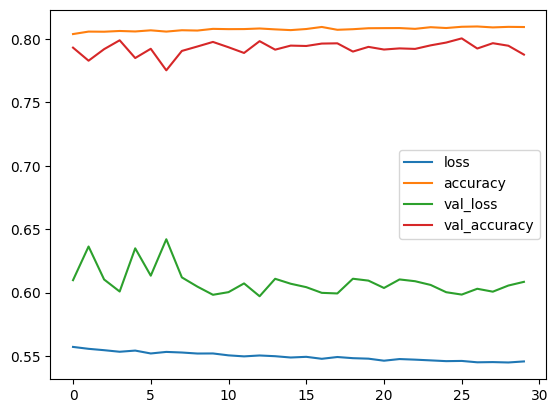

In [ ]:
import pandas as pd
pd.DataFrame(normal_12.history).plot()

#Normalized but label not one hot

In [ ]:
model_13 = tf.keras.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(4,activation='relu'),
        tf.keras.layers.Dense(10,activation='softmax')
    ]
)


In [ ]:
model_13.compile (loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  metrics= ["accuracy"])

In [ ]:
normal_13=model_13.fit(train_data_norm, train_labels , epochs=10, validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 1.3661 - accuracy: 0.4926 - val_loss: 0.9581 - val_accuracy: 0.6633
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8170 - accuracy: 0.7062 - val_loss: 0.7681 - val_accuracy: 0.7307
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7070 - accuracy: 0.7476 - val_loss: 0.7081 - val_accuracy: 0.7543
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6598 - accuracy: 0.7684 - val_loss: 0.6752 - val_accuracy: 0.7701
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6356 - accuracy: 0.7754 - val_loss: 0.6645 - val_accuracy: 0.7680
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6209 - accuracy: 0.7821 - val_loss: 0.6557 - val_accuracy: 0.7740
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6098 - accuracy: 0.7860 - val_loss: 0.6554 - val_accuracy:

<Axes: title={'center': 'normalized non one hot'}>

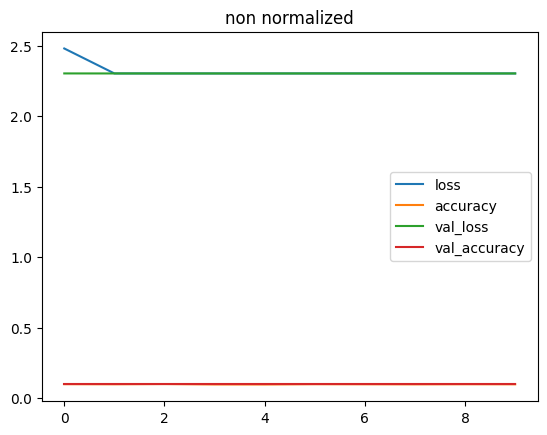

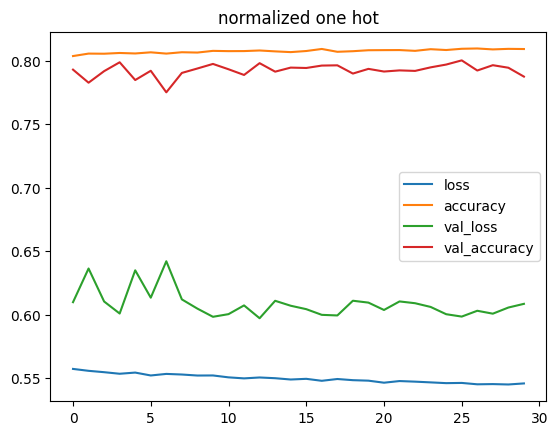

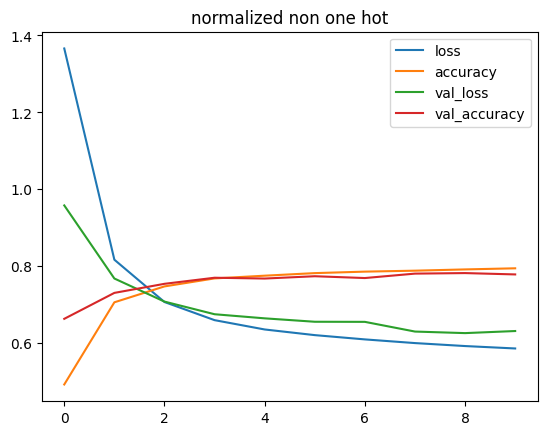

In [ ]:
pd.DataFrame(non_norm_history.history).plot(title="non normalized")
pd.DataFrame(normal_12.history).plot(title="normalized one hot")

pd.DataFrame(normal_13.history).plot(title="normalized non one hot")



In [ ]:
#finding ideal learning rate

In [ ]:
tf.random.set_seed(42)
model_14= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),


])

model_14.compile (loss=tf.keras.losses.SparseCategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

#create learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch/20))
find_lr_history= model_14.fit(train_data_norm, train_labels,epochs=40, validation_data=(test_data_norm,test_labels),callbacks=[lr_scheduler])



Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2864 - accuracy: 0.4780 - val_loss: 0.9964 - val_accuracy: 0.6349 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9301 - accuracy: 0.6604 - val_loss: 0.9088 - val_accuracy: 0.6513 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.8635 - accuracy: 0.6849 - val_loss: 0.8609 - val_accuracy: 0.6698 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8319 - accuracy: 0.6923 - val_loss: 0.8372 - val_accuracy: 0.6754 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8160 - accuracy: 0.6963 - val_loss: 0.8384 - val_accuracy: 0.6885 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8032 - accuracy: 0.6995 - val_loss: 0.8307 - val_accuracy: 0.6969 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding ideal learning rate')

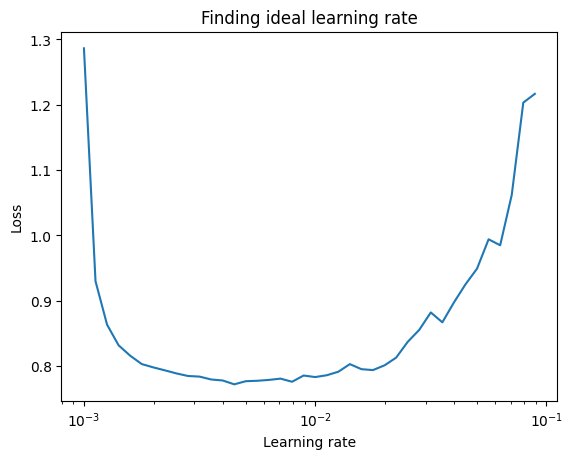

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
lrs= 1e-3 * (10** (tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")